# 📊 Data Exploration - SAR Processing System

Welcome to Phase 1 of the Financial Services Agentic AI Project!

In this notebook, you'll explore the financial data that forms the foundation of our SAR (Suspicious Activity Report) processing system. Understanding this data is crucial for designing effective Pydantic schemas and building your AI agents.

## 🎯 Learning Objectives
- Understand the structure of customer, account, and transaction data
- Identify relationships between different data entities
- Recognize patterns that might indicate suspicious activity
- Prepare for designing Pydantic schemas in `foundation_sar.py`

## 📋 Business Context
Financial institutions are required by law to monitor customer transactions and report suspicious activities to authorities. This process involves:
- **Customer Due Diligence**: Understanding who your customers are
- **Transaction Monitoring**: Watching for unusual patterns
- **Risk Assessment**: Evaluating the likelihood of financial crimes
- **Regulatory Reporting**: Filing SARs when required

## 🚀 Setup and Data Loading

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)

print("📚 Libraries loaded successfully!")
print("🎯 Ready to explore financial data for SAR processing")

📚 Libraries loaded successfully!
🎯 Ready to explore financial data for SAR processing


In [2]:
# Load the three main data files
customers_df = pd.read_csv('../data/customers.csv')
accounts_df = pd.read_csv('../data/accounts.csv')
transactions_df = pd.read_csv('../data/transactions.csv')

print("📊 Data loaded successfully!")
print(f"👥 Customers: {len(customers_df):,} records")
print(f"🏦 Accounts: {len(accounts_df):,} records")
print(f"💳 Transactions: {len(transactions_df):,} records")

📊 Data loaded successfully!
👥 Customers: 150 records
🏦 Accounts: 178 records
💳 Transactions: 4,268 records


## 👥 Customer Data Analysis

In [3]:
# Explore customer data structure
print("📋 Customer Data Overview")
print("=" * 50)
print(f"Shape: {customers_df.shape}")
print(f"Columns: {list(customers_df.columns)}")
print("\n📊 First few records:")
customers_df.head()

📋 Customer Data Overview
Shape: (150, 10)
Columns: ['customer_id', 'name', 'date_of_birth', 'ssn_last_4', 'address', 'phone', 'customer_since', 'risk_rating', 'occupation', 'annual_income']

📊 First few records:


,customer_id,name,date_of_birth,ssn_last_4,address,phone,customer_since,risk_rating,occupation,annual_income
0,CUST_0001,Allison Hill,1958-08-25,2679,"600 Jeffery Parkways, New Jamesside, MT 29394",394.802.6542x351,2016-06-14,Low,Local government officer,48815
1,CUST_0002,Renee Blair,1978-05-14,7201,"959 Janet Cape Apt. 413, South Joshuastad, GA ...",(534)719-2832x764,2023-03-03,Low,Banker,72005
2,CUST_0003,Andrew Stewart,1961-06-14,4456,"PSC 9537, Box 6724, APO AE 32826",001-388-249-6965x3287,2023-05-02,Low,"Designer, ceramics/pottery",48664
3,CUST_0004,Rebecca Henderson,1948-08-02,7252,"480 Erin Plain Suite 514, Mooretown, VA 94830",282-781-4893x252,2019-12-25,Low,Clinical research associate,54285
4,CUST_0005,Sherry Decker,1963-12-16,1949,"71822 Arroyo Expressway, Allisonchester, IL 71187",001-534-565-7871x33150,2015-08-25,Low,Barrister's clerk,87356


In [4]:
# Analyze customer data types and missing values
print("🔍 Customer Data Quality Analysis")
print("=" * 50)
print("\n📊 Data Types:")
print(customers_df.dtypes)
print("\n❓ Missing Values:")
print(customers_df.isnull().sum())
print("\n📈 Basic Statistics:")
customers_df.describe(include='all')

🔍 Customer Data Quality Analysis

📊 Data Types:
customer_id       object
name              object
date_of_birth     object
ssn_last_4         int64
address           object
phone             object
customer_since    object
risk_rating       object
occupation        object
annual_income      int64
dtype: object

❓ Missing Values:
customer_id       0
name              0
date_of_birth     0
ssn_last_4        0
address           0
phone             0
customer_since    0
risk_rating       0
occupation        0
annual_income     0
dtype: int64

📈 Basic Statistics:


,customer_id,name,date_of_birth,ssn_last_4,address,phone,customer_since,risk_rating,occupation,annual_income
count,150,150,150,150.000000,150,150,150,150,150,150.000000
unique,150,150,149,NaN,150,150,148,3,130,NaN
top,CUST_0001,Allison Hill,1970-10-30,NaN,"600 Jeffery Parkways, New Jamesside, MT 29394",394.802.6542x351,2019-04-25,Low,Teaching laboratory technician,NaN
freq,1,1,2,NaN,1,1,2,118,3,NaN
mean,NaN,NaN,NaN,5722.413333,NaN,NaN,NaN,NaN,NaN,84477.826667
...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,NaN,1090.000000,NaN,NaN,NaN,NaN,NaN,30284.000000
25%,NaN,NaN,NaN,3494.000000,NaN,NaN,NaN,NaN,NaN,52581.250000
50%,NaN,NaN,NaN,5878.500000,NaN,NaN,NaN,NaN,NaN,71810.000000
75%,NaN,NaN,NaN,7849.750000,NaN,NaN,NaN,NaN,NaN,91118.250000


⚠️ Customer Risk Rating Analysis
risk_rating
Low       118
Medium     25
High        7
Name: count, dtype: int64


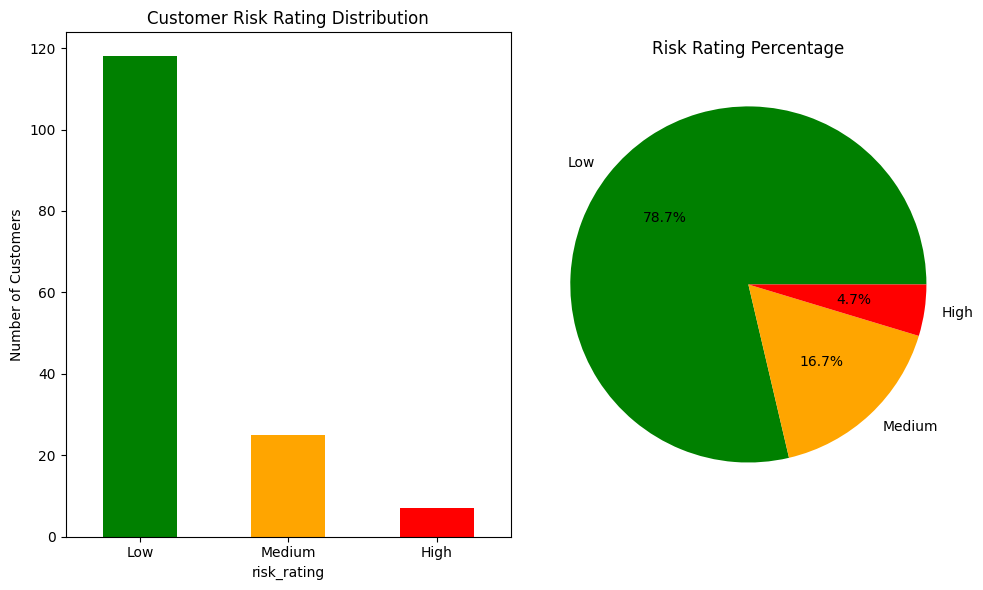


💡 Key Insights:
• 7 customers (4.7%) are High Risk
• These high-risk customers require enhanced monitoring


In [5]:
# Analyze risk ratings distribution
print("⚠️ Customer Risk Rating Analysis")
print("=" * 50)
risk_counts = customers_df['risk_rating'].value_counts()
print(risk_counts)

# Visualize risk distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
risk_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Customer Risk Rating Distribution')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%', 
        colors=['green', 'orange', 'red'])
plt.title('Risk Rating Percentage')

plt.tight_layout()
plt.show()

print(f"\n💡 Key Insights:")
print(f"• {risk_counts['High']} customers ({risk_counts['High']/len(customers_df)*100:.1f}%) are High Risk")
print(f"• These high-risk customers require enhanced monitoring")

### 📝 TODO: Design CustomerData Schema

Based on your exploration above, you'll need to create a Pydantic schema in `foundation_sar.py` that includes:

```python
class CustomerData(BaseModel):
    customer_id: str = Field(..., description="Unique customer identifier")
    # TODO: Add all other fields with appropriate types
    # Consider: validation rules, optional fields, field descriptions
```

**Questions to consider:**
- Which fields are required vs optional?
- What validation rules should you add (e.g., date formats, risk rating values)?
- How will you handle the SSN field for privacy?

## 🏦 Account Data Analysis

In [6]:
# Explore account data structure
print("📋 Account Data Overview")
print("=" * 50)
print(f"Shape: {accounts_df.shape}")
print(f"Columns: {list(accounts_df.columns)}")
print("\n📊 First few records:")
accounts_df.head()

📋 Account Data Overview
Shape: (178, 7)
Columns: ['account_id', 'customer_id', 'account_type', 'opening_date', 'current_balance', 'average_monthly_balance', 'status']

📊 First few records:


,account_id,customer_id,account_type,opening_date,current_balance,average_monthly_balance,status
0,CUST_0001_ACC_1,CUST_0001,Checking,2020-05-06,51690.75,0.00,Closed
1,CUST_0002_ACC_1,CUST_0002,Money_Market,2023-12-03,92121.66,172242.96,Active
2,CUST_0003_ACC_1,CUST_0003,Savings,2024-09-11,55458.06,127691.16,Active
3,CUST_0004_ACC_1,CUST_0004,Savings,2022-07-01,72296.19,0.00,Closed
4,CUST_0005_ACC_1,CUST_0005,Money_Market,2016-12-15,95327.95,0.00,Closed


💰 Account Analysis

🏦 Account Types:
account_type
Money_Market         48
Checking             44
Business_Checking    44
Savings              42
Name: count, dtype: int64

💵 Balance Statistics:
       current_balance  average_monthly_balance
count       178.000000               178.000000
mean      53623.018820            112713.608202
std       28276.544824             88984.275551
min        1008.470000                 0.000000
25%       30692.320000             83495.732500
50%       56865.055000            120237.815000
75%       77785.737500            151401.497500
max       99932.150000            860095.530000


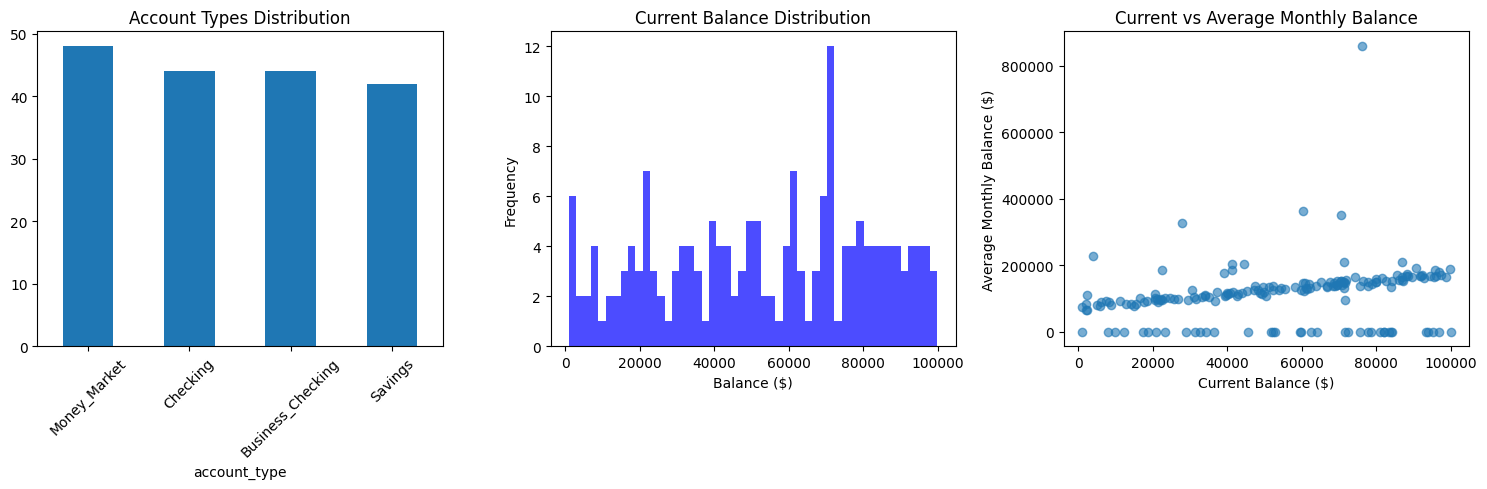

In [7]:
# Analyze account types and balances
print("💰 Account Analysis")
print("=" * 50)

# Account types
print("\n🏦 Account Types:")
account_types = accounts_df['account_type'].value_counts()
print(account_types)

# Balance analysis
print("\n💵 Balance Statistics:")
print(accounts_df[['current_balance', 'average_monthly_balance']].describe())

# Visualize balance distributions
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
account_types.plot(kind='bar')
plt.title('Account Types Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
plt.hist(accounts_df['current_balance'], bins=50, alpha=0.7, color='blue')
plt.title('Current Balance Distribution')
plt.xlabel('Balance ($)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(accounts_df['current_balance'], accounts_df['average_monthly_balance'], alpha=0.6)
plt.title('Current vs Average Monthly Balance')
plt.xlabel('Current Balance ($)')
plt.ylabel('Average Monthly Balance ($)')

plt.tight_layout()
plt.show()

🔗 Customer-Account Relationships

📊 Accounts per Customer:
1    130
2     12
3      8
Name: count, dtype: int64

👥 Customers with multiple accounts: 20
📈 Max accounts per customer: 3


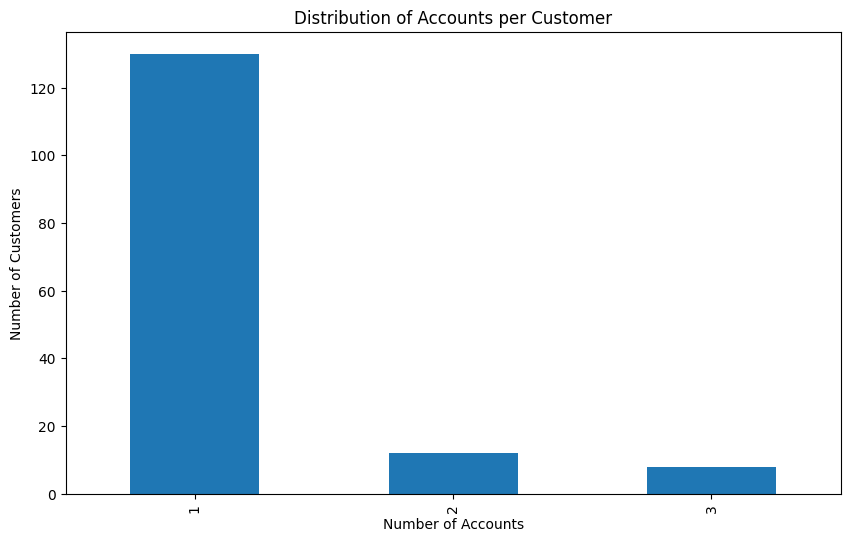

In [8]:
# Analyze customer-account relationships
print("🔗 Customer-Account Relationships")
print("=" * 50)

# How many accounts per customer?
accounts_per_customer = accounts_df.groupby('customer_id').size()
print("\n📊 Accounts per Customer:")
print(accounts_per_customer.value_counts().sort_index())

# Customers with multiple accounts
multi_account_customers = accounts_per_customer[accounts_per_customer > 1]
print(f"\n👥 Customers with multiple accounts: {len(multi_account_customers)}")
print(f"📈 Max accounts per customer: {accounts_per_customer.max()}")

# Visualize accounts per customer
plt.figure(figsize=(10, 6))
accounts_per_customer.value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Accounts per Customer')
plt.xlabel('Number of Accounts')
plt.ylabel('Number of Customers')
plt.show()

### 📝 TODO: Design AccountData Schema

Key considerations for your AccountData schema:
- How will you link accounts to customers?
- What validation is needed for balance fields?
- How will you handle account status values?

## 💳 Transaction Data Analysis

In [9]:
# Explore transaction data structure
print("📋 Transaction Data Overview")
print("=" * 50)
print(f"Shape: {transactions_df.shape}")
print(f"Columns: {list(transactions_df.columns)}")
print("\n📊 First few records:")
transactions_df.head()

📋 Transaction Data Overview
Shape: (4268, 9)
Columns: ['transaction_id', 'account_id', 'transaction_date', 'transaction_type', 'amount', 'description', 'counterparty', 'location', 'method']

📊 First few records:


,transaction_id,account_id,transaction_date,transaction_type,amount,description,counterparty,location,method
0,TXN_B24455F3,CUST_0002_ACC_1,2025-02-18,Online_Transfer,1615.06,Credit card payment,NaN,Branch_Westside_Plaza,ATM
1,TXN_0A18BAD4,CUST_0002_ACC_1,2025-02-22,Check_Deposit,2564.42,Gas station,NaN,NaN,Electronic
2,TXN_F3A18FF3,CUST_0002_ACC_1,2025-07-31,ACH_Credit,3192.71,Utility bill,NaN,NaN,Online
3,TXN_0003D37D,CUST_0002_ACC_1,2025-03-04,Check_Deposit,4664.01,Mortgage payment,NaN,Branch_Downtown_Main,Branch
4,TXN_4FEA8992,CUST_0002_ACC_1,2025-03-26,ACH_Credit,1426.10,Salary deposit,NaN,Branch_University_District,ATM


In [10]:
# Convert transaction_date to datetime for analysis
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])

print("💰 Transaction Analysis")
print("=" * 50)

# Transaction types
print("\n📊 Transaction Types:")
txn_types = transactions_df['transaction_type'].value_counts()
print(txn_types)

# Transaction methods
print("\n💳 Transaction Methods:")
txn_methods = transactions_df['method'].value_counts()
print(txn_methods)

# Amount statistics
print("\n💵 Transaction Amount Statistics:")
print(transactions_df['amount'].describe())

💰 Transaction Analysis

📊 Transaction Types:
transaction_type
Online_Transfer         563
ACH_Debit               553
ACH_Credit              544
ATM_Withdrawal          534
Wire_Transfer           508
                       ... 
Debit_Purchase          490
Cash_Deposit             50
Wire_Transfer_Debit      17
Cash_Withdrawal           5
Wire_Transfer_Credit      4
Name: count, Length: 12, dtype: int64

💳 Transaction Methods:
method
Electronic    910
ATM           894
Online        808
Mobile        806
Branch        804
Cash           25
Wire           21
Name: count, dtype: int64

💵 Transaction Amount Statistics:
count     4268.000000
mean      2668.532800
std       3083.916636
min         11.670000
25%       1256.260000
50%       2485.715000
75%       3756.482500
max      98090.160000
Name: amount, dtype: float64


In [11]:
# Analyze transaction patterns for suspicious activity indicators
print("🚨 Suspicious Activity Pattern Analysis")
print("=" * 50)

# Large transactions (potential money laundering)
large_transactions = transactions_df[transactions_df['amount'] >= 100000]
print(f"\n💰 Large transactions (≥$100k): {len(large_transactions)}")

# Transactions just under $10k (potential structuring)
structuring_range = transactions_df[
    (transactions_df['amount'] >= 9000) & 
    (transactions_df['amount'] < 10000)
]
print(f"🔄 Potential structuring ($9k-$10k): {len(structuring_range)}")

# High-frequency customers (many transactions)
txn_per_account = transactions_df.groupby('account_id').size()
high_frequency_accounts = txn_per_account[txn_per_account >= 50]
print(f"📈 High-frequency accounts (≥50 txns): {len(high_frequency_accounts)}")

# Wire transfers (higher risk method)
wire_transfers = transactions_df[transactions_df['method'] == 'Wire']
print(f"🌐 Wire transfers: {len(wire_transfers)}")

print(f"\n⚠️ Potential Suspicious Indicators:")
print(f"• {len(large_transactions)} large transactions requiring enhanced scrutiny")
print(f"• {len(structuring_range)} transactions in structuring range")
print(f"• {len(high_frequency_accounts)} accounts with high transaction frequency")
print(f"• {len(wire_transfers)} wire transfers (higher risk method)")

🚨 Suspicious Activity Pattern Analysis

💰 Large transactions (≥$100k): 0
🔄 Potential structuring ($9k-$10k): 18
📈 High-frequency accounts (≥50 txns): 7
🌐 Wire transfers: 21

⚠️ Potential Suspicious Indicators:
• 0 large transactions requiring enhanced scrutiny
• 18 transactions in structuring range
• 7 accounts with high transaction frequency
• 21 wire transfers (higher risk method)


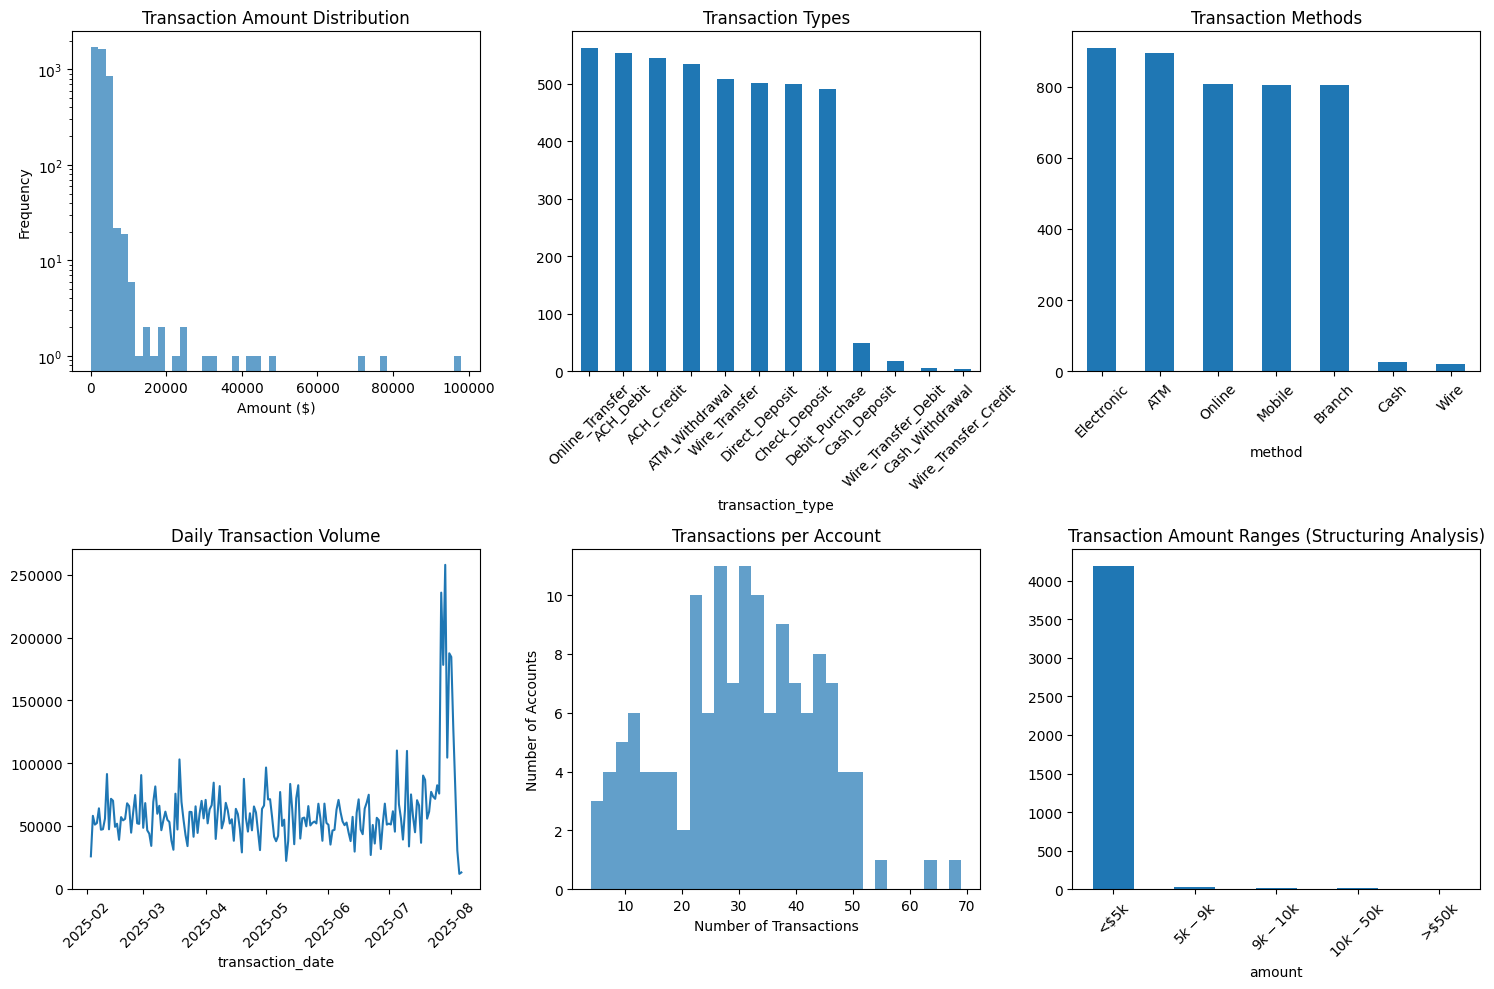

In [12]:
# Visualize transaction patterns
plt.figure(figsize=(15, 10))

# Transaction amounts distribution
plt.subplot(2, 3, 1)
plt.hist(transactions_df['amount'], bins=50, alpha=0.7)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale due to wide range

# Transaction types
plt.subplot(2, 3, 2)
txn_types.plot(kind='bar')
plt.title('Transaction Types')
plt.xticks(rotation=45)

# Transaction methods
plt.subplot(2, 3, 3)
txn_methods.plot(kind='bar')
plt.title('Transaction Methods')
plt.xticks(rotation=45)

# Daily transaction volume
plt.subplot(2, 3, 4)
daily_volume = transactions_df.groupby(transactions_df['transaction_date'].dt.date)['amount'].sum()
daily_volume.plot()
plt.title('Daily Transaction Volume')
plt.xticks(rotation=45)

# Transaction count per account
plt.subplot(2, 3, 5)
plt.hist(txn_per_account, bins=30, alpha=0.7)
plt.title('Transactions per Account')
plt.xlabel('Number of Transactions')
plt.ylabel('Number of Accounts')

# Structuring analysis
plt.subplot(2, 3, 6)
amount_ranges = pd.cut(transactions_df['amount'], 
                      bins=[0, 5000, 9000, 10000, 50000, float('inf')],
                      labels=['<$5k', '$5k-$9k', '$9k-$10k', '$10k-$50k', '>$50k'])
amount_ranges.value_counts().plot(kind='bar')
plt.title('Transaction Amount Ranges (Structuring Analysis)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 🔗 Data Relationships Analysis

In [13]:
# Analyze the complete data relationship chain
print("🔗 Complete Data Relationship Analysis")
print("=" * 50)

# Join all datasets to understand relationships
# First join accounts with customers
customer_accounts = accounts_df.merge(customers_df, on='customer_id', how='left')

# Then join with transactions
full_data = transactions_df.merge(customer_accounts, on='account_id', how='left')

print(f"\n📊 Combined dataset shape: {full_data.shape}")
print(f"✅ Successful joins: {len(full_data[full_data['customer_id'].notna()])} / {len(full_data)}")

# Check for any orphaned records
orphaned_transactions = full_data[full_data['customer_id'].isna()]
if len(orphaned_transactions) > 0:
    print(f"⚠️ Found {len(orphaned_transactions)} orphaned transactions (no matching account/customer)")
else:
    print("✅ All transactions have valid account and customer relationships")

🔗 Complete Data Relationship Analysis

📊 Combined dataset shape: (4268, 24)
✅ Successful joins: 4268 / 4268
✅ All transactions have valid account and customer relationships


In [14]:
# Analyze high-risk customer activity
print("⚠️ High-Risk Customer Activity Analysis")
print("=" * 50)

# Filter for high-risk customers
high_risk_data = full_data[full_data['risk_rating'] == 'High']

print(f"\n📊 High-risk customer transactions: {len(high_risk_data)}")
print(f"💰 Total high-risk transaction volume: ${high_risk_data['amount'].sum():,.2f}")
print(f"📈 Average transaction amount: ${high_risk_data['amount'].mean():,.2f}")

# High-risk customers with large transactions
high_risk_large = high_risk_data[high_risk_data['amount'] >= 50000]
print(f"\n🚨 High-risk customers with large transactions (≥$50k): {len(high_risk_large)}")

if len(high_risk_large) > 0:
    print("\n🔍 Sample high-risk large transactions:")
    print(high_risk_large[['name', 'amount', 'transaction_type', 'method', 'transaction_date']].head())

⚠️ High-Risk Customer Activity Analysis

📊 High-risk customer transactions: 407
💰 Total high-risk transaction volume: $1,172,007.73
📈 Average transaction amount: $2,879.63

🚨 High-risk customers with large transactions (≥$50k): 1

🔍 Sample high-risk large transactions:
                      name    amount      transaction_type method  \
4112  Jacqueline Rodriguez  76517.25  Wire_Transfer_Credit   Wire   

     transaction_date  
4112       2025-07-29  


In [15]:
# Identify potential cases for SAR processing
print("🎯 Potential SAR Cases Identification")
print("=" * 50)

# Define criteria for suspicious cases
def identify_suspicious_cases(df):
    suspicious_criteria = {
        'high_risk_customers': df['risk_rating'] == 'High',
        'large_transactions': df['amount'] >= 100000,
        'high_frequency': df.groupby('customer_id')['transaction_id'].transform('count') >= 50,
        'wire_transfers': df['method'] == 'Wire'
    }
    
    # Apply any of the criteria
    suspicious_mask = (
        suspicious_criteria['high_risk_customers'] |
        suspicious_criteria['large_transactions'] |
        suspicious_criteria['high_frequency'] |
        suspicious_criteria['wire_transfers']
    )
    
    return df[suspicious_mask], suspicious_criteria

suspicious_data, criteria = identify_suspicious_cases(full_data)

print(f"\n📊 Suspicious transactions identified: {len(suspicious_data)}")
print(f"👥 Unique customers involved: {suspicious_data['customer_id'].nunique()}")

# Break down by criteria
print("\n🔍 Breakdown by criteria:")
for criterion, mask in criteria.items():
    count = full_data[mask]['customer_id'].nunique()
    print(f"• {criterion.replace('_', ' ').title()}: {count} customers")

# Top customers by transaction volume
customer_volumes = suspicious_data.groupby(['customer_id', 'name'])['amount'].agg(['sum', 'count']).reset_index()
customer_volumes = customer_volumes.sort_values('sum', ascending=False)

print("\n💰 Top 5 customers by suspicious transaction volume:")
print(customer_volumes.head())

🎯 Potential SAR Cases Identification

📊 Suspicious transactions identified: 1482
👥 Unique customers involved: 25

🔍 Breakdown by criteria:
• High Risk Customers: 7 customers
• Large Transactions: 0 customers
• High Frequency: 20 customers
• Wire Transfers: 4 customers

💰 Top 5 customers by suspicious transaction volume:
   customer_id                  name        sum  count
16   CUST_0111  Jacqueline Rodriguez  386834.91    121
7    CUST_0062       Michael Stanley  380633.78     90
6    CUST_0057         Cindy Clayton  286342.62    101
5    CUST_0053           Tracy Lewis  274025.18     94
17   CUST_0118      Patrick Williams  222070.26     79


## 📝 Key Insights and Next Steps

In [16]:
# Summary of key insights for schema design
print("🔍 DATA EXPLORATION SUMMARY")
print("=" * 60)

print("\n📊 Dataset Overview:")
print(f"• {len(customers_df)} customers ({customers_df['risk_rating'].value_counts()['High']} high-risk)")
print(f"• {len(accounts_df)} accounts ({accounts_df['account_type'].nunique()} types)")
print(f"• {len(transactions_df)} transactions (${transactions_df['amount'].sum():,.2f} total volume)")

print("\n🚨 Suspicious Activity Indicators:")
print(f"• {len(large_transactions)} large transactions (≥$100k)")
print(f"• {len(structuring_range)} potential structuring transactions ($9k-$10k)")
print(f"• {len(high_frequency_accounts)} high-frequency accounts (≥50 transactions)")
print(f"• {suspicious_data['customer_id'].nunique()} customers with suspicious patterns")

print("\n🏗️ Schema Design Requirements:")
print("• CustomerData: Handle optional fields, validate risk ratings")
print("• AccountData: Link to customers, validate balances")
print("• TransactionData: Validate amounts, handle date formats")
print("• CaseData: Combine all entities with metadata")

print("\n🎯 Next Steps:")
print("1. Implement Pydantic schemas in src/foundation_sar.py")
print("2. Create DataLoader to build unified case objects")
print("3. Add comprehensive data validation")
print("4. Test with the suspicious cases identified above")

print("\n🚀 Ready to move to Phase 2: Agent Development!")

🔍 DATA EXPLORATION SUMMARY

📊 Dataset Overview:
• 150 customers (7 high-risk)
• 178 accounts (4 types)
• 4268 transactions ($11,389,297.99 total volume)

🚨 Suspicious Activity Indicators:
• 0 large transactions (≥$100k)
• 18 potential structuring transactions ($9k-$10k)
• 7 high-frequency accounts (≥50 transactions)
• 25 customers with suspicious patterns

🏗️ Schema Design Requirements:
• CustomerData: Handle optional fields, validate risk ratings
• AccountData: Link to customers, validate balances
• TransactionData: Validate amounts, handle date formats
• CaseData: Combine all entities with metadata

🎯 Next Steps:
1. Implement Pydantic schemas in src/foundation_sar.py
2. Create DataLoader to build unified case objects
3. Add comprehensive data validation
4. Test with the suspicious cases identified above

🚀 Ready to move to Phase 2: Agent Development!


## 📋 TODO: Implementation Checklist

Based on your data exploration, complete these tasks in `src/foundation_sar.py`:

### ✅ Pydantic Schemas
- [ ] `CustomerData` - Include all customer fields with proper validation
- [ ] `AccountData` - Include account details with balance validation
- [ ] `TransactionData` - Include transaction fields with amount/date validation
- [ ] `CaseData` - Combine customer, accounts, and transactions
- [ ] `RiskAnalystOutput` - Structure for risk analysis results
- [ ] `ComplianceOfficerOutput` - Structure for compliance narratives

### ✅ Utility Classes
- [ ] `ExplainabilityLogger` - Audit trail logging system
- [ ] `DataLoader` - Case object creation from CSV data

### ✅ Testing
- [ ] Test schemas with the actual data from this exploration
- [ ] Validate that all suspicious cases can be processed
- [ ] Ensure proper error handling for edge cases

**💡 Pro Tip**: Use the insights from this exploration to guide your validation rules. For example, you now know that risk ratings are 'Low', 'Medium', or 'High', so you can use a Literal type for validation.

---

## 🧪 Testing Your Implementation

Once you've implemented the schemas in `src/foundation_sar.py`, validate your work with this two-step testing procedure:

### Step 1: Smoke Test - Basic Import and Instantiation

In [17]:
# 🧪 STEP 1: Smoke Test - Basic Import and Instantiation
# This test verifies that your classes can be imported and basic objects created

import sys
import os

# Add src directory to Python path so we can import our modules
project_root = os.path.abspath('..')  # Go up one level from notebooks to starter
src_path = os.path.join(project_root, 'src')
sys.path.insert(0, src_path)

print(f"📁 Added to Python path: {src_path}")
print(f"🔍 Current working directory: {os.getcwd()}")

try:
    # Import your implemented classes
    from foundation_sar import (
        CustomerData,
        AccountData, 
        TransactionData,
        CaseData,
        RiskAnalystOutput,
        ComplianceOfficerOutput,
        ExplainabilityLogger,
        DataLoader
    )
    
    print("✅ All classes imported successfully!")
    
    # Test basic instantiation with minimal data
    print("\n🧪 Testing basic object creation...")
    
    # Test CustomerData
    customer = CustomerData(
        customer_id="TEST_001",
        name="Test Customer",
        date_of_birth="1990-01-01",
        ssn_last_4="1234",
        address="123 Test St",
        customer_since="2020-01-01",
        risk_rating="Low"
    )
    print(f"✅ CustomerData created: {customer.name}")
    
    # Test AccountData  
    account = AccountData(
        account_id="TEST_001_ACC_1",
        customer_id="TEST_001",
        account_type="Checking",
        opening_date="2020-01-01",
        current_balance=1000.0,
        average_monthly_balance=800.0,
        status="Active"
    )
    print(f"✅ AccountData created: {account.account_type}")
    
    # Test TransactionData
    transaction = TransactionData(
        transaction_id="TXN_TEST_001",
        account_id="TEST_001_ACC_1",
        transaction_date="2025-01-01",
        transaction_type="Cash_Deposit",
        amount=500.0,
        description="Test transaction",
        method="Cash"
    )
    print(f"✅ TransactionData created: ${transaction.amount}")
    
    # Test utility classes
    logger = ExplainabilityLogger("smoke_test.jsonl")
    loader = DataLoader(logger)
    print("✅ ExplainabilityLogger and DataLoader created")
    
    print("\n🎉 SMOKE TEST PASSED! Your basic implementation is working.")
    print("📝 Now proceed to Step 2 for comprehensive testing.")
    
except ImportError as e:
    print(f"❌ Import Error: {e}")
    print("💡 Make sure you've implemented all classes in src/foundation_sar.py")
    print("📝 Classes needed: CustomerData, AccountData, TransactionData, CaseData,")
    print("   RiskAnalystOutput, ComplianceOfficerOutput, ExplainabilityLogger, DataLoader")
    
except Exception as e:
    print(f"❌ Error creating objects: {e}")
    print("💡 Check your Pydantic schema implementations for required fields and validation")
    
finally:
    # Cleanup test file if created
    if os.path.exists("smoke_test.jsonl"):
        os.remove("smoke_test.jsonl")

📁 Added to Python path: c:\Users\john_\Documents\MyPlace\ITDevelopement\Python\Projects\udacity_fs_agentic_ai\cd14685-fin-serv-agentic-c1-classroom\project\starter\src
🔍 Current working directory: c:\Users\john_\Documents\MyPlace\ITDevelopement\Python\Projects\udacity_fs_agentic_ai\cd14685-fin-serv-agentic-c1-classroom\project\starter\notebooks
✅ All classes imported successfully!

🧪 Testing basic object creation...
✅ CustomerData created: Test Customer
✅ AccountData created: Checking
✅ TransactionData created: $500.0
✅ ExplainabilityLogger and DataLoader created

🎉 SMOKE TEST PASSED! Your basic implementation is working.
📝 Now proceed to Step 2 for comprehensive testing.


### Step 2: Full Test Suite - Comprehensive Validation

In [18]:
# 🧪 STEP 2: Full Test Suite - Comprehensive Validation
# This runs the complete test suite to validate your implementation

import sys
import os

# os.chdir("..")
# print(os.getcwd())
# Ensure path is set up (in case this cell is run independently)
project_root = os.path.abspath('..')
src_path = os.path.join(project_root, 'src')
tests_path = os.path.join(project_root, 'tests')

if src_path not in sys.path:
    sys.path.insert(0, src_path)
if tests_path not in sys.path:
    sys.path.insert(0, tests_path)

print(f"📁 Python path includes:")
print(f"   📂 src: {src_path}")
print(f"   📂 tests: {tests_path}")
print(f"sys.path: {sys.path}")

try:
    # Import and run tests from the test suite
    # test_foundation
    from test_foundation import (
        TestCustomerData,
        TestAccountData,
        TestTransactionData,
        TestCaseData,
        TestDataLoader,
        TestExplainabilityLogger
    )
    
    print("✅ Test classes imported successfully!")
    print("\n🧪 Running comprehensive test suite...")
    print("=" * 60)
    
    # Initialize test instances
    test_customer = TestCustomerData()
    test_account = TestAccountData()
    test_transaction = TestTransactionData()
    test_case = TestCaseData()
    test_loader = TestDataLoader()
    test_logger = TestExplainabilityLogger()
    
    tests_passed = 0
    tests_failed = 0
    
    # Run CustomerData tests
    print("\n👥 Testing CustomerData...")
    try:
        test_customer.test_valid_customer_data()
        print("  ✅ Valid customer data test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ Valid customer data test failed: {e}")
        tests_failed += 1
        
    try:
        test_customer.test_customer_risk_rating_validation()
        print("  ✅ Risk rating validation test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ Risk rating validation test failed: {e}")
        tests_failed += 1
    
    # Run AccountData tests
    print("\n🏦 Testing AccountData...")
    try:
        test_account.test_valid_account_data()
        print("  ✅ Valid account data test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ Valid account data test failed: {e}")
        tests_failed += 1
        
    try:
        test_account.test_account_balance_validation()
        print("  ✅ Account balance validation test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ Account balance validation test failed: {e}")
        tests_failed += 1
    
    # Run TransactionData tests
    print("\n💳 Testing TransactionData...")
    try:
        test_transaction.test_valid_transaction_data()
        print("  ✅ Valid transaction data test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ Valid transaction data test failed: {e}")
        tests_failed += 1
        
    try:
        test_transaction.test_transaction_amount_validation()
        print("  ✅ Transaction amount validation test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ Transaction amount validation test failed: {e}")
        tests_failed += 1
    
    # Run CaseData tests
    print("\n📋 Testing CaseData...")
    try:
        test_case.test_valid_case_creation()
        print("  ✅ Valid case creation test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ Valid case creation test failed: {e}")
        tests_failed += 1
    
    # Run DataLoader tests
    print("\n📊 Testing DataLoader...")
    try:
        test_loader.test_csv_data_loading()
        print("  ✅ CSV data loading test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ CSV data loading test failed: {e}")
        tests_failed += 1
    
    # Run ExplainabilityLogger tests
    print("\n📝 Testing ExplainabilityLogger...")
    try:
        test_logger.test_log_creation()
        print("  ✅ Log creation test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ Log creation test failed: {e}")
        tests_failed += 1
        
    try:
        test_logger.test_log_file_writing()
        print("  ✅ Log file writing test passed")
        tests_passed += 1
    except Exception as e:
        print(f"  ❌ Log file writing test failed: {e}")
        tests_failed += 1
    
    # Summary
    print("\n" + "=" * 60)
    print(f"📊 TEST SUMMARY:")
    print(f"✅ Tests Passed: {tests_passed}")
    print(f"❌ Tests Failed: {tests_failed}")
    print(f"📈 Success Rate: {tests_passed/(tests_passed+tests_failed)*100:.1f}%")
    
    if tests_failed == 0:
        print("\n🎉 CONGRATULATIONS! All tests passed!")
        print("🚀 Your foundation_sar.py implementation is complete and ready.")
        print("📝 You can now proceed to Phase 2: Agent Development.")
    else:
        print(f"\n⚠️  {tests_failed} tests failed. Review the error messages above.")
        print("💡 Common issues:")
        print("   • Missing required fields in Pydantic schemas")
        print("   • Incorrect field types or validation rules")
        print("   • Missing validation decorators")
        print("   • Incomplete method implementations")
        print("📝 Fix the issues and re-run this cell.")
        
except ImportError as e:
    print(f"❌ Import Error: {e}")
    print("💡 Make sure your implementation is complete and error-free")
    print("📝 Run Step 1 first to check basic imports")
    
except Exception as e:
    print(f"❌ Unexpected error: {e}")
    print("💡 Check your implementation for syntax or logic errors")

📁 Python path includes:
   📂 src: c:\Users\john_\Documents\MyPlace\ITDevelopement\Python\Projects\udacity_fs_agentic_ai\cd14685-fin-serv-agentic-c1-classroom\project\starter\src
   📂 tests: c:\Users\john_\Documents\MyPlace\ITDevelopement\Python\Projects\udacity_fs_agentic_ai\cd14685-fin-serv-agentic-c1-classroom\project\starter\tests
sys.path: ['c:\\Users\\john_\\Documents\\MyPlace\\ITDevelopement\\Python\\Projects\\udacity_fs_agentic_ai\\cd14685-fin-serv-agentic-c1-classroom\\project\\starter\\tests', 'c:\\Users\\john_\\Documents\\MyPlace\\ITDevelopement\\Python\\Projects\\udacity_fs_agentic_ai\\cd14685-fin-serv-agentic-c1-classroom\\project\\starter\\src', 'C:\\Users\\john_\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\john_\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\john_\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\john_\\AppData\\Local\\Programs\\Python\\Python313', 'c:\\Users\\john_\\Documents\\MyPlace\\ITDevelo

## ✅ Next Steps After Successful Testing

Once both testing steps pass:

### 🎯 Immediate Actions
1. **Verify** all test output shows ✅ passed status
2. **Review** any warning messages for potential improvements  
3. **Check** that audit log files are created properly

### 🚀 Ready for Phase 2: Agent Development
Navigate to `notebooks/02_agent_development.ipynb` to:
- Build the Risk Analyst Agent (Chain-of-Thought prompting)
- Implement the Compliance Officer Agent (ReACT framework)
- Test agents with the cases identified in this exploration

### 🔧 Troubleshooting Common Issues
- **Import Errors**: Ensure `src/foundation_sar.py` has no syntax errors
- **Validation Errors**: Check Pydantic field types match the data types from exploration
- **Missing Methods**: Verify all TODO sections are implemented, not just `pass` statements

### 📚 Reference
- Your data exploration insights from this notebook
- Implementation checklist above
- Test results from Step 2 validation

**💡 Pro Tip**: Keep this notebook open for reference - the data patterns you discovered here will guide your agent prompting strategies in Phase 2!